# 08 - Random Forest

- Random forest works by bootstrap aggregation. ("bagging"). It samples the data with replacement and fits a tree on the sample
- Then you average the prediction of all tree
- You *also* restrict the columns ('column subsampling') 
    - this means each time you are getting a bootstrap sample of data and a subsample of columns to split on!
    - this helps reduce the correlation between trees, reduce overfitting, and increase the diversity of trees
- this is an ensemble method

In [20]:
from setup import * #gets the real data

In [21]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, dummy, preprocessing, ensemble
import xgboost as xgb
import dtreeviz
#also, must install graphviz for plotting to work with xgb

In [22]:
rf = ensemble.RandomForestClassifier(random_state=42)
rf.fit(X_train, kag_y_train)
rf.score(X_test, kag_y_test)

0.7237569060773481

In [23]:
rf.get_params() #no underscore here because these were determined by default, not by hyperparameter tuning!

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [24]:
#rf.estimators_

In [25]:
type(rf.estimators_)

list

In [26]:
str(rf.estimators_)
#rf.estimators_.__dir__()

"[DecisionTreeClassifier(max_features='sqrt', random_state=1608637542), DecisionTreeClassifier(max_features='sqrt', random_state=1273642419), DecisionTreeClassifier(max_features='sqrt', random_state=1935803228), DecisionTreeClassifier(max_features='sqrt', random_state=787846414), DecisionTreeClassifier(max_features='sqrt', random_state=996406378), DecisionTreeClassifier(max_features='sqrt', random_state=1201263687), DecisionTreeClassifier(max_features='sqrt', random_state=423734972), DecisionTreeClassifier(max_features='sqrt', random_state=415968276), DecisionTreeClassifier(max_features='sqrt', random_state=670094950), DecisionTreeClassifier(max_features='sqrt', random_state=1914837113), DecisionTreeClassifier(max_features='sqrt', random_state=669991378), DecisionTreeClassifier(max_features='sqrt', random_state=429389014), DecisionTreeClassifier(max_features='sqrt', random_state=249467210), DecisionTreeClassifier(max_features='sqrt', random_state=1972458954), DecisionTreeClassifier(max

In [27]:
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(kag_y_train)
y_test = label_encoder.transform(kag_y_test)

In [28]:
rf_xg = xgb.XGBRFClassifier(random_state=42)
rf_xg.fit(X_train, y_train)
rf_xg.score(X_test, y_test) #steady improvement

0.7458563535911602

In [29]:
# note XGBoost uses different hyperparameters than scikit-learn!
# they look very different names!
rf_xg.get_params()

{'colsample_bynode': 0.8,
 'learning_rate': 1.0,
 'reg_lambda': 1e-05,
 'subsample': 0.8,
 'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

<Axes: >

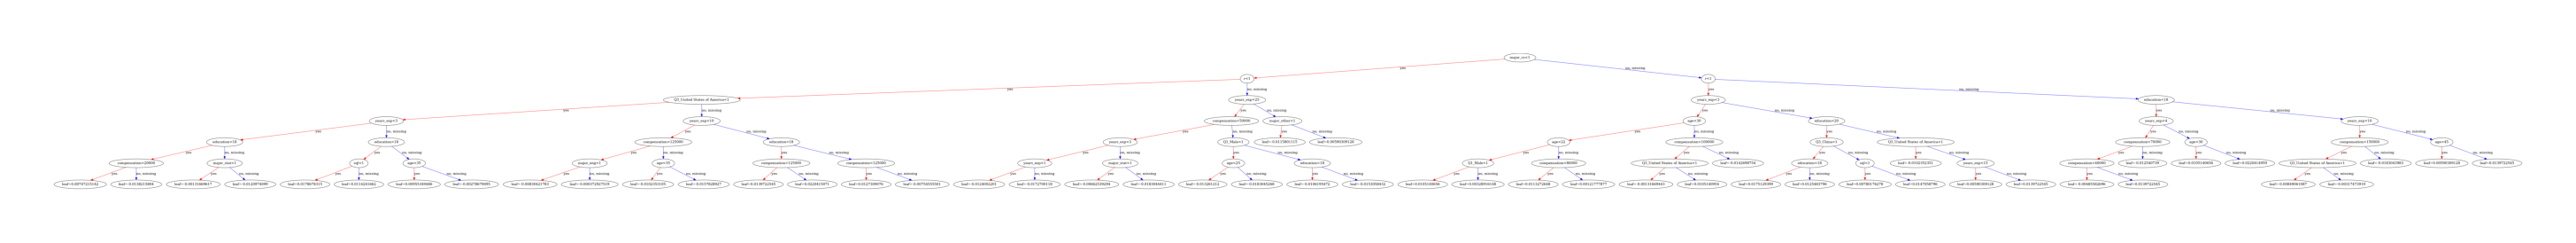

In [30]:
fig, ax = plt.subplots(figsize=(6,12), dpi=600)
xgb.plot_tree(rf_xg, num_trees=0, ax=ax, size='1,1')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

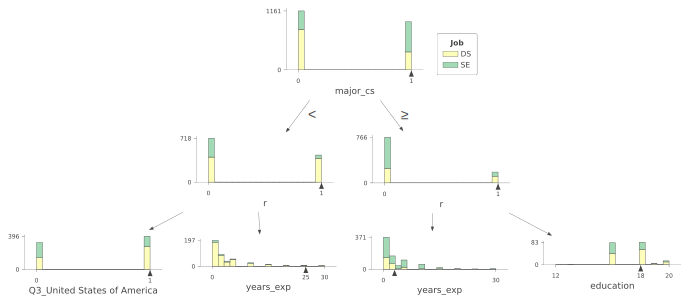

In [31]:
viz = dtreeviz.model(rf_xg, X_train=X_train, y_train=y_train, target_name='Job',
                     feature_names=list(X_train.columns), class_names=['DS', 'SE'], tree_index=0)
viz.view(depth_range_to_display=[0,2])

# 08.4 Random Forest Hyperparameters

# 08.5 Training the Number of Trees in the Forest

In [ ]:

from yellowbrick.model_selection import validation_curve
fig, ax = plt.subplots(figsize=(10,4))
viz=validaation_curve(xgb.XGBClassifier(random_state=42),
    x=pd.concat([X_train, X_test], axis='index')
    y=np.concatenate([y_train, y_test])),
param_name='n_estimators', param_range = range(1,100,2),
scoring='accuracy', cv=3